#Basic

In [128]:
%matplotlib inline

##Controlling figure aesthetics
Drawing attractive figures is important. When making figures for yourself, as you explore a dataset, it’s nice to have plots that are pleasant to look at. Visualizations are also central to communicating quantitative insights to an audience, and in that setting it’s even more necessary to have figures that catch the attention and draw a viewer in.  

Matplotlib is highly customizable, but it can be hard to know what settings to tweak to achieve an attractive plot. Seaborn comes with a number of customized themes and a high-level interface for controlling the look of matplotlib figures.  

In [129]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(sum(map(ord, "aesthetics")))

Let’s define a simple function to plot some offset sine waves, which will help us see the different stylistic parameters we can tweak.

In [130]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

This is what the plot looks like with matplotlib defaults:

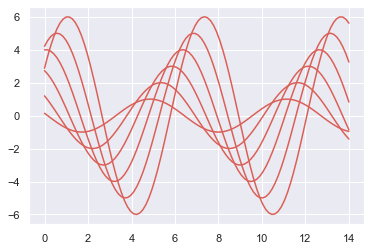

In [131]:
sinplot()

To switch to seaborn defaults, simply import the package.

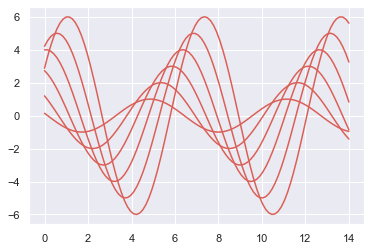

In [132]:
import seaborn as sns
sinplot()

The seaborn defaults break from the MATLAB inspired aesthetic of matplotlib to plot in more muted colors over a light gray background with white grid lines. We find that the grid aids in the use of figures for conveying quantitative information – in almost all cases, figures should be preferred to tables. The white-on-gray grid that is used by default avoids being obtrusive. The grid is particularly useful in giving structure to figures with multiple facets, which is central to some of the more complex tools in the library.  

Seaborn splits matplotlib parameters into two independent groups. The first group sets the aesthetic style of the plot, and the second scales various elements of the figure so that it can be easily incorporated into different contexts.  

The interface for manipulating these parameters are two pairs of functions. To control the style, use the `axes_style()` and `set_style()` functions. To scale the plot, use the `plotting_context()` and `set_context()` functions. In both cases, the first function returns a dictionary of parameters and the second sets the matplotlib defaults.  

##Styling figures with `axes_style()` and `set_style()`
There are five preset seaborn themes: `darkgrid, whitegrid, dark, white,` and `ticks`. They are each suited to different applications and personal preferences. The default theme is `darkgrid`. As mentioned above, the grid helps the plot serve as a lookup table for quantitative information, and the white-on grey helps to keep the grid from competing with lines that represent data. The `whitegrid` theme is similar, but it is better suited to plots with heavy data elements:  

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

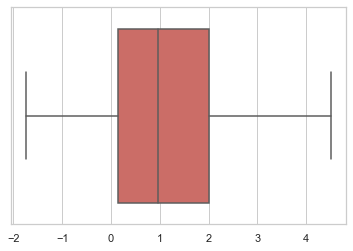

In [133]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data)

For many plots, (especially for settings like talks, where you primarily want to use figures to provide impressions of patterns in the data), the grid is less necessary.

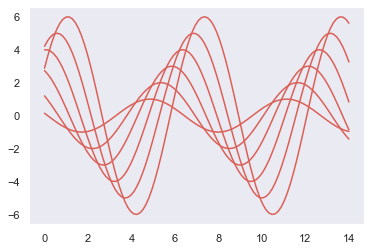

In [134]:
sns.set_style("dark")
sinplot()

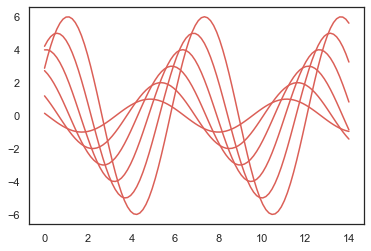

In [135]:
sns.set_style("white")
sinplot()

Sometimes you might want to give a little extra structure to the plots, which is where ticks come in handy:

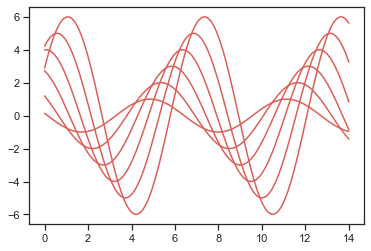

In [136]:
sns.set_style("ticks")
sinplot()

##Removing spines with `despine()`
Both the `white` and `ticks` styles can benefit from removing the top and right axes spines, which are not needed. It’s impossible to do this through the matplotlib parameters, but you can call the seaborn function `despine()` to remove them:

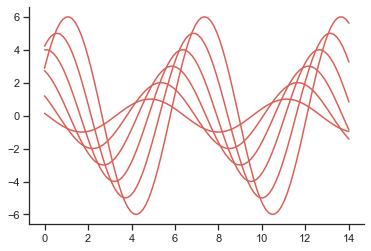

In [137]:
sinplot()
sns.despine()

Some plots benefit from offsetting the spines away from the data, which can also be done when calling `despine()`. When the ticks don’t cover the whole range of the axis, the `trim` parameter will limit the range of the surviving spines.

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


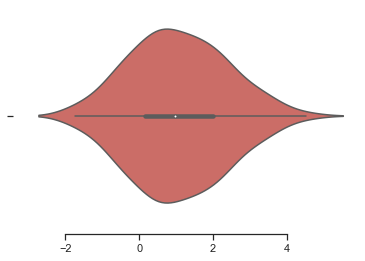

In [138]:
f, ax = plt.subplots()
sns.violinplot(data)
sns.despine(offset=10, trim=True)

You can also control which spines are removed with additional arguments to `despine()`:

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


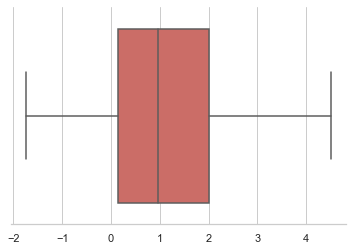

In [139]:
sns.set_style("whitegrid")
sns.boxplot(data)
sns.despine(left=True)

##Temporarily setting figure style
Although it’s easy to switch back and forth, you can also use the `axes_style()` function in a with statement to temporarily set plot parameters. This also allows you to make figures with differently-styled axes:

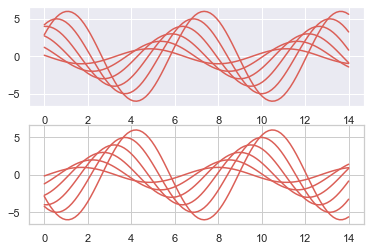

In [140]:
with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

##Overriding elements of the seaborn styles
If you want to customize the seaborn styles, you can pass a dictionary of parameters to the rc argument of `axes_style()` and `set_style()`. Note that you can only override the parameters that are part of the style definition through this method. (However, the higher-level `set()` function takes a dictionary of any matplotlib parameters).  

If you want to see what parameters are included, you can just call the function with no arguments, which will return the current settings:

In [141]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

You can then set different versions of these parameters:

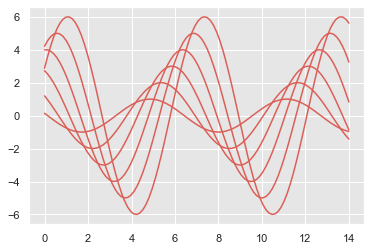

In [142]:
sns.set_style("darkgrid", {"grid.linewidth": .5, "axes.facecolor": ".9"})
sinplot()

##Scaling plot elements with `plotting_context()` and `set_context()`
A separate set of parameters control the scale of plot elements, which should let you use the same code to make plots that are suited for use in settings where larger or smaller plots are appropriate.

First let’s reset the default parameters by calling `set()`:

In [143]:
sns.set()

The four preset contexts, in order of relative size, are `paper, notebook, talk,` and `poster`. The `notebook` style is the default, and was used in the plots above.

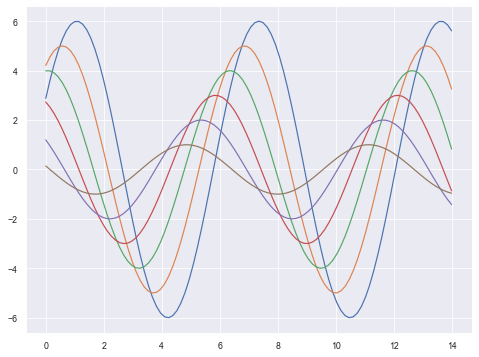

In [144]:
sns.set_context("paper")
plt.figure(figsize=(8, 6))
sinplot()

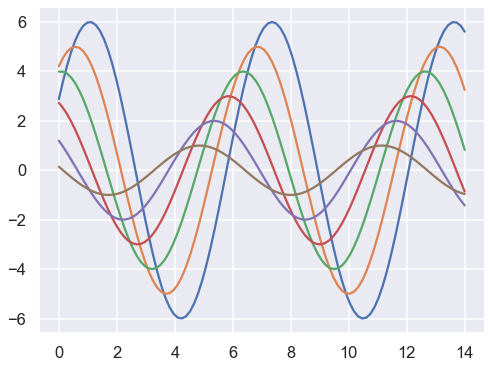

In [145]:
sns.set_context("talk")
plt.figure(figsize=(8, 6))
sinplot()

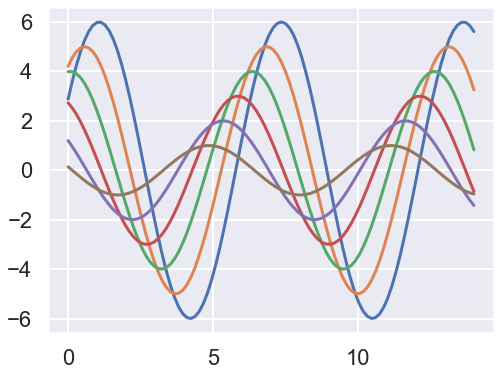

In [146]:
sns.set_context("poster")
plt.figure(figsize=(8, 6))
sinplot()

Most of what you now know about the style functions should transfer to the context functions.

You can call `set_context()` with one of these names to set the parameters, and you can override the parameters by providing a dictionary of parameter values.

You can also independently scale the size of the font elements when changing the context. (This option is also available through the top-level `set()` function).

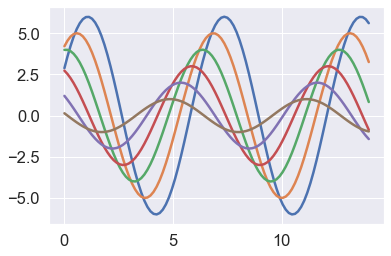

In [147]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

Similarly (although it might be less useful), you can temporarily control the scale of figures nested under a with statement.

Both the style and the context can be quickly configured with the set() function. 

#Choosing color palettes
Color is more important than other aspects of figure style because color can reveal patterns in the data if used effectively or hide those patterns if used poorly. There are a number of great resources to learn about good techniques for using color in visualizations, I am partial to this series of blog posts from Rob Simmon and this more technical paper. The matplotlib docs also now have a nice tutorial that illustrates some of the perceptual properties of the built in colormaps.

Seaborn makes it easy to select and use color palettes that are suited to the kind of data you are working with and the goals you have in visualizing it.


In [148]:
sns.set(rc={"figure.figsize": (6, 6)})
np.random.seed(sum(map(ord, "palettes")))

##Building color palettes with `color_palette()`
The most important function for working with discrete color palettes is `color_palette()`. This function provides an interface to many (though not all) of the possible ways you can generate colors in seaborn, and it’s used internally by any function that has a palette argument (and in some cases for a color argument when multiple colors are needed).

`color_palette()` will accept the name of any seaborn palette or matplotlib colormap (except jet, which you should never use). It can also take a list of colors specified in any valid matplotlib format (RGB tuples, hex color codes, or HTML color names). The return value is always a list of RGB tuples.

Finally, calling `color_palette()` with no arguments will return the current default color cycle.

A corresponding function, `set_palette()`, takes the same arguments and will set the default color cycle for all plots. You can also use `color_palette()` in a with statement to temporarily change the default palette (see below).

It is generally not possible to know what kind of color palette or colormap is best for a set of data without knowing about the characteristics of the data. Following that, we’ll break up the different ways to use `color_palette()` and other seaborn palette functions by the three general kinds of color palettes: qualitative, sequential, and diverging.

##Qualitative color palettes
Qualitative (or categorical) palettes are best when you want to distinguish discrete chunks of data that do not have an inherent ordering.

When importing seaborn, the default color cycle is changed to a set of six colors that evoke the standard matplotlib color cycle while aiming to be a bit more pleasing to look at.

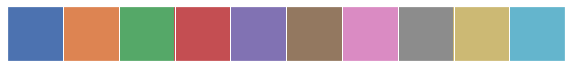

In [149]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

There are six variations of the default theme, called `deep, muted, pastel, bright, dark,` and `colorblind`.

###Using circular color systems
When you have more than six categories to distinguish, the easiest thing is to draw evenly-spaced colors in a circular color space (such that the hue changes which keeping the brightness and saturation constant). This is what most seaborn functions default to when they need to use more colors than are currently set in the default color cycle.

The most common way to do this uses the `hls` color space, which is a simple transformation of RGB values.

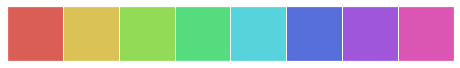

In [150]:
sns.palplot(sns.color_palette("hls", 8))

There is also the `hls_palette()` function that lets you control the lightness and saturation of the colors.

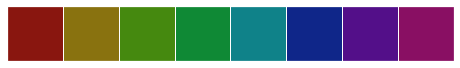

In [151]:
sns.palplot(sns.hls_palette(8, l=.3, s=.8))

##Sequential palettes with cubehelix_palette()
The cubehelix color palette system makes sequential palettes with a linear increase or decrease in brightness and some variation in hue. This means that the information in your colormap will be preserved when converted to black and white (for printing) or when viewed by a colorblind individual.

Matplotlib has the default cubehelix version built into it:

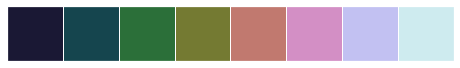

In [152]:
sns.palplot(sns.color_palette("cubehelix", 8))

By default you just get a list of colors, like any other seaborn palette, but you can also return the palette as a colormap object that can be passed to seaborn or matplotlib functions using `as_cmap=True`.

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

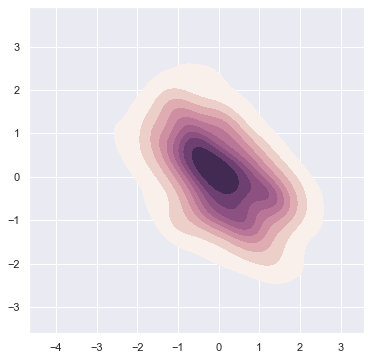

In [153]:
x, y = np.random.multivariate_normal(
    [0, 0], [[1, -.5], [-.5, 1]], size=300).T
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=cmap, shade=True)

To help select good palettes or colormaps using this system, you can use the `choose_cubehelix_palette()` function in a notebook to launch an interactive app that will let you play with the different parameters. Pass `as_cmap=True` if you want the function to return a colormap (rather than a list) for use in function like `hexbin`.

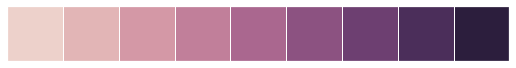

[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.8888663743660877, 0.7106793139856472, 0.7158661451411206],
 [0.8314793143949643, 0.5987041921652179, 0.6530062709235388],
 [0.7588951019517731, 0.49817117746394224, 0.6058723814510268],
 [0.6672565752652589, 0.40671838146419587, 0.5620016466433286],
 [0.5529215689527474, 0.3217924564263954, 0.5093718054521851],
 [0.43082755198027817, 0.24984535814964698, 0.44393960899639856],
 [0.29794615023641036, 0.18145907625614888, 0.35317781405034754],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

In [154]:
sns.choose_cubehelix_palette()

##Custom sequential palettes with `light_palette()` and `dark_palette()`
For a simpler interface to custom sequential palettes, you can use `light_palette()` or `dark_palette()`, which are both seeded with a single color and produce a palette that ramps either from light or dark desaturated values to that color. These functions are also accompanied by the `choose_light_palette()` and `choose_dark_palette()` functions that launch interactive widgets to create these palettes.   
They can also be used to create colormap objects rather than lists of colors.

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

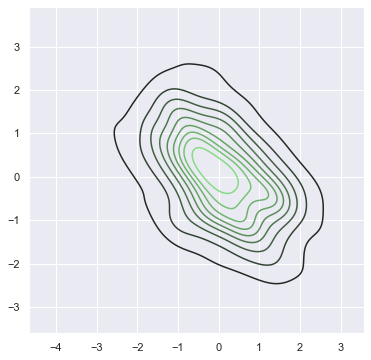

In [155]:
pal = sns.dark_palette("palegreen", as_cmap=True)
sns.kdeplot(x, y, cmap=pal)

By default, the input can be any valid matplotlib color. Alternate interpretations are controlled by the `input` argument. Currently you can provide tuples in `hls` or `husl` space along with the default `rgb`, and you can also seed the palette with any valid `xkcd` color.

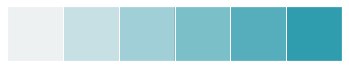

In [156]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))

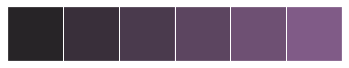

In [157]:
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))

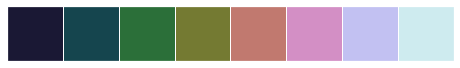

In [158]:
sns.palplot(sns.color_palette("cubehelix", 8))

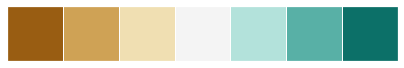

In [159]:
sns.palplot(sns.color_palette("BrBG", 7))

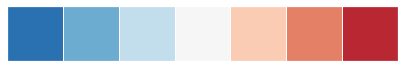

In [160]:
sns.palplot(sns.color_palette("RdBu_r", 7))

##Changing default palettes with set_palette()
The `color_palette()` function has a companion called `set_palette()`. `set_palette()` accepts the same arguments as `color_palette()`, but it changes the default matplotlib parameters so that the palette is used for all plots.

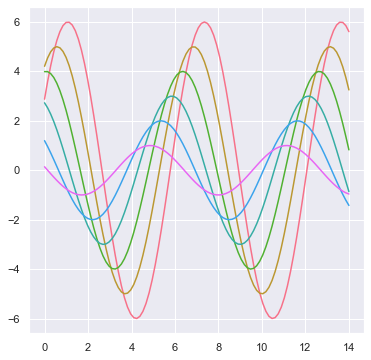

In [161]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sns.set_palette("husl")
sinplot()

#Visualizing distributions of data
##Basic visualization with histograms
The most basic and common way of representing a distributions is with a histogram. We can do this directly through the `hist` function that is part of matplotlib.

In [162]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
np.random.seed(9221999)

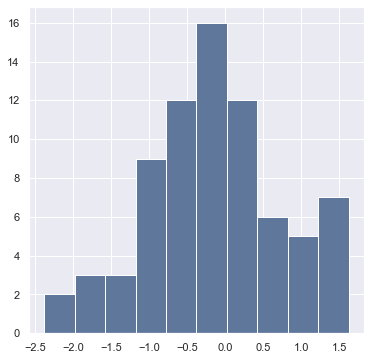

In [164]:
data = randn(75)
plt.hist(data)
plt.show()

By default, `hist` separates the data into 10 bins of equal widths and plots the number of observations in each bin. Thus, the main parameter is the number of bins, which we can change.

The more bins you have, the more sensitive you will be to high-frequency patterns in the distribution. But, sometimes those high-frequency patterns will be noise. Often you want to try different values until you think you have best captured what you see in the data.

(array([ 3., 10., 16., 24., 13.,  9.]),
 array([-2.38310441, -1.71563807, -1.04817172, -0.38070538,  0.28676097,
         0.95422731,  1.62169366]),
 <BarContainer object of 6 artists>)

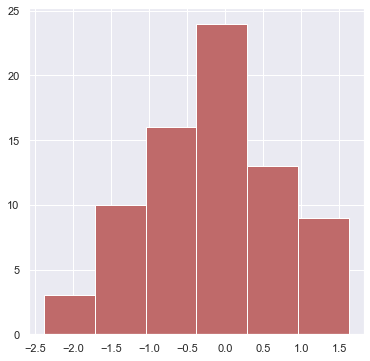

In [165]:
plt.hist(data, 6, color=sns.desaturate("indianred", .75))

The `normed` argument can also be useful if you want to compare two distributions that do not have the same number of observations. Note also that `bins` can be a sequence of where each bin starts.

(array([ 2.,  2., 11., 20., 23., 22., 15., 16.,  4.,  5.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

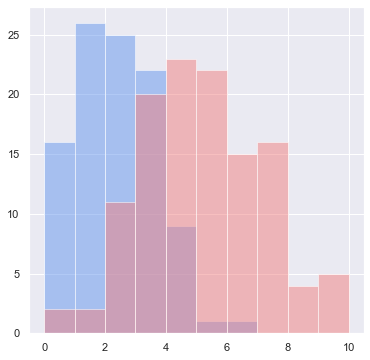

In [166]:
data1 = stats.poisson(2).rvs(100)
data2 = stats.poisson(5).rvs(120)
max_data = np.r_[data1, data2].max()
bins = np.linspace(0, max_data, max_data + 1)
plt.hist(data1, bins, color="#6495ED", alpha=.5)
plt.hist(data2, bins, color="#F08080", alpha=.5)

The `hist` function has quite a few other options, which you can explore in its docstring. Here we’ll just highlight one more that can be useful when plotting many observations (such as following a resampling procedure).

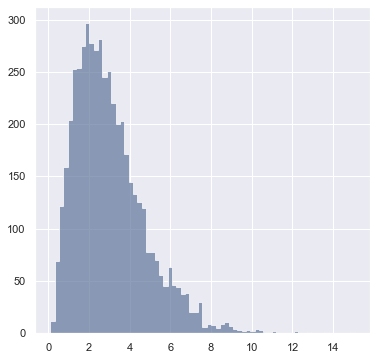

In [167]:
x = stats.gamma(3).rvs(5000)
plt.hist(x, 70, histtype="stepfilled", alpha=.7);

You can also represent a joint distribution with the histogram method, using a hexbin plot. This is similar to a histogram, except instead of coding the number of observations in each bin with a position on one of the axes, it uses a color-mapping to give the plot three quantitative dimensions.

In `seaborn`, you can draw a hexbin plot using the `jointplot` function and setting kind to `"hex"`. This will also plot the marginal distribution of each variable on the sides of the plot using a histrogram:

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


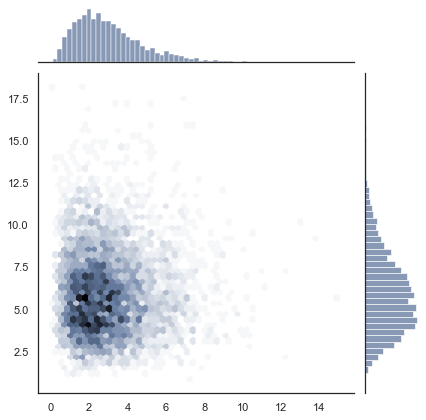

In [168]:
y = stats.gamma(6).rvs(5000)
with sns.axes_style("white"):
    sns.jointplot(x, y, kind="hex")

##Estimating the density of the observations: `kdeplot` and `rugplot`
A superior, if more computationally intensive, approach to estimating a distribution is known as a kernel density estimate, or KDE. To motivate the KDE, let’s first think about rug plots. A rug plot is a very simple, but also perfectly legitimate, way of representing a distribution. To create one, simply draw a vertical line at each observed data point. Here, the height is totally arbitrary.

(0.0, 1.0)

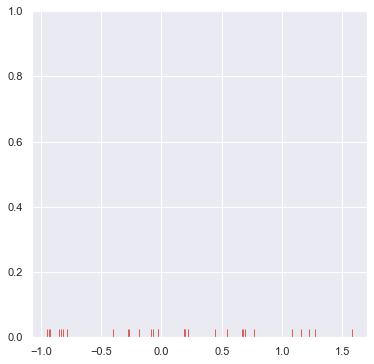

In [169]:
sns.set_palette("hls", 1)
data = randn(30)
sns.rugplot(data)
plt.ylim(0, 1)

You can see where the density of the distribution is by how dense the tick-marks are. Before talking about kernel density plots, let’s connect the rug plot to the histogram. The connection here is very direct: a histogram just creates bins along the range of the data and then draws a bar with height equal to the number of ticks in each bin

<AxesSubplot:>

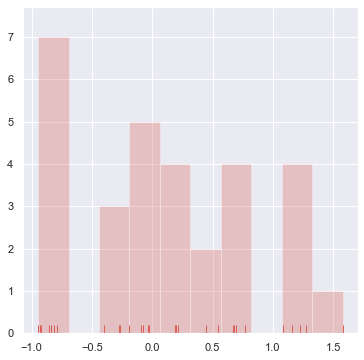

In [170]:
plt.hist(data, alpha=.3)
sns.rugplot(data)

A kernel density plot is also a transformation from the tick marks to a height-encoded measure of density. However, the transformaiton is a bit more complicated. Instead of binning each tick mark, we will instead represent each tick with a gaussian basis function.

(0.0, 1.0)

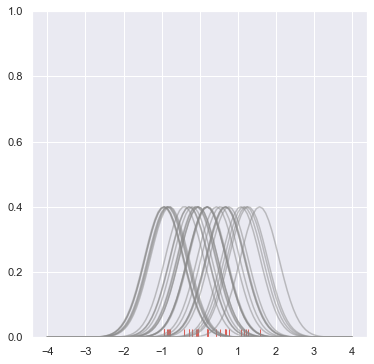

In [171]:
# Draw the rug and set up the x-axis space
sns.rugplot(data);
xx = np.linspace(-4, 4, 100)

# Compute the bandwidth of the kernel using a rule-of-thumb
bandwidth = ((4 * data.std() ** 5) / (3 * len(data))) ** .2
bandwidth = len(data) ** (-1. / 5)

# We'll save the basis functions for the next step
kernels = []

# Plot each basis function
for d in data:

    # Make the basis function as a gaussian PDF
    kernel = stats.norm(d, bandwidth).pdf(xx)
    kernels.append(kernel)

    # Scale for plotting
    kernel /= kernel.max()
    kernel *= .4
    plt.plot(xx, kernel, "#888888", alpha=.5)
plt.ylim(0, 1)

We then estimate the distribution that our samples came from from by summing these basis functions (and normalizing so, as a proper density, the function integrates to 1).

There is also a function in the `scipy.stats` module that will perform a kernel density estimate (it actually returns an object that can be called on some values to return the density). We see that plotting the values from this object give us basically the same results as summing the gaussian basis functions.

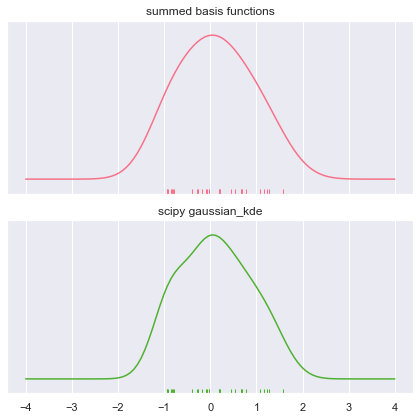

In [172]:
# Set up the plots
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
c1, c2 = sns.color_palette("husl", 3)[:2]

# Plot the summed basis functions
summed_kde = np.sum(kernels, axis=0)
ax1.plot(xx, summed_kde, c=c1)
sns.rugplot(data, c=c1, ax=ax1)
ax1.set_yticks([])
ax1.set_title("summed basis functions")

# Use scipy to get the density estimate
scipy_kde = stats.gaussian_kde(data)(xx)
ax2.plot(xx, scipy_kde, c=c2)
sns.rugplot(data, c=c2, ax=ax2)
ax2.set_yticks([])
ax2.set_title("scipy gaussian_kde")
f.tight_layout()

The seaborn package has a high-level function for plotting a kernel density estimate in one quick step, along with some additional nice features, such as shading in the density.

<AxesSubplot:ylabel='Density'>

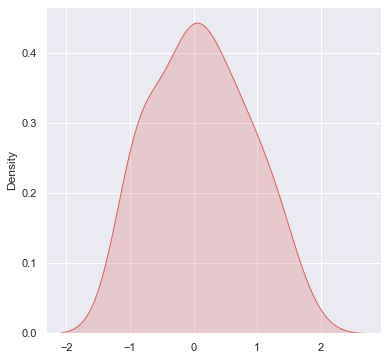

In [173]:
sns.kdeplot(data, shade=True)

Much like how the `bins` parameter controls the fit of the histogram to the data, you can adjust the bandwidth (bw) of the kernel to make the densisty estimate more or less sensitive to high-frequency structure.

C:\Program Files\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is

<AxesSubplot:ylabel='Density'>

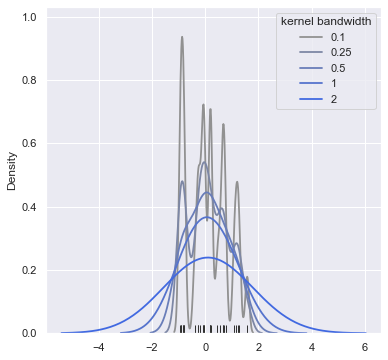

In [174]:
pal = sns.blend_palette([sns.desaturate("royalblue", 0), "royalblue"], 5)
bws = [.1, .25, .5, 1, 2]

for bw, c in zip(bws, pal):
    sns.kdeplot(data, bw=bw, color=c, lw=1.8, label=bw)

plt.legend(title="kernel bandwidth")
sns.rugplot(data, color="#333333")

Although the gaussian kernel is the most common, and probably the most useful, there are a variety of kernels you can use to fit the density estimate. The kernel you choose generally has less influence on the resulting estimate thean the bandwidth size, but there may be situations where you want to experiment with different choices.

C:\Program Files\Python39\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Program Files\Python39\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Program Files\Python39\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Program Files\Python39\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Program Files\Python39\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Program Files\Python39\lib\site-

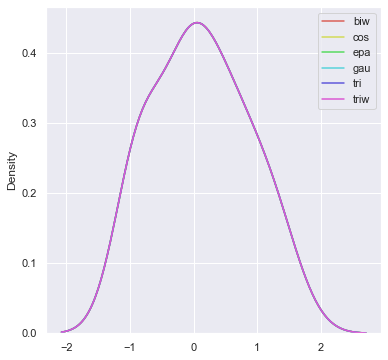

In [175]:
kernels = ["biw", "cos", "epa", "gau", "tri", "triw"]
pal = sns.color_palette("hls", len(kernels))
for k, c in zip(kernels, pal):
    sns.kdeplot(data, kernel=k, color=c, label=k)
plt.legend()

The `cut` and `clip` parameters allows you to control how far outside the range of the data the estimate extends: cut influences only the range of the support, while `clip` affects the fitting of the KDE as well.

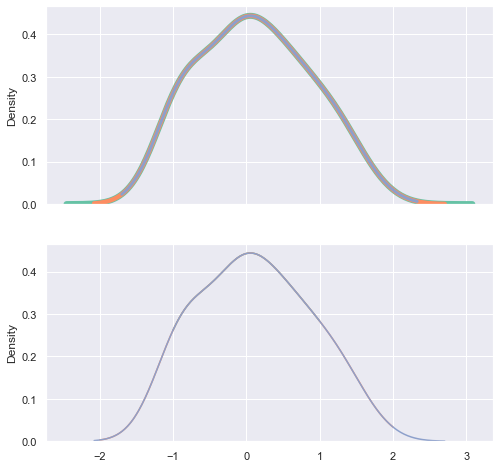

In [176]:
with sns.color_palette("Set2"):
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
    for cut in [4, 3, 2]:
        sns.kdeplot(data, cut=cut, label=cut, lw=cut * 1.5, ax=ax1)

    for clip in [1, 2, 3]:
        sns.kdeplot(data, clip=(-clip, clip), label=clip, ax=ax2)

As in the case of the histogram, plotting shaded density plots on top of each other can be a good way to ask whether two samples are from the same distribution. This also implements a simple classification operation. For a given `x` value with an unknown label, you should conclude it was drawn from the distribution with a greater density at that value.

A legend can be helpful when overlaying several densities. This is done either by providing a `label` keyword to `kdeplot`, which explicitly assigns a value to the data, or by inferring the name if you pass an object (like a Pandas Series) with a `name` attribute.

<AxesSubplot:xlabel='dist3', ylabel='Density'>

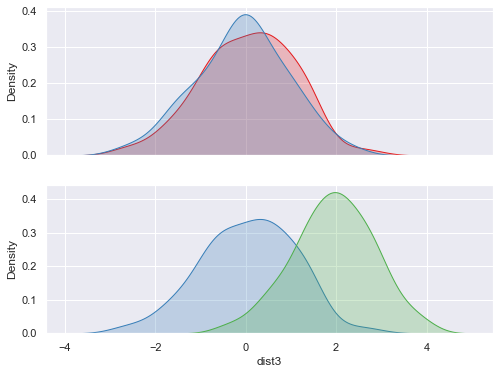

In [177]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
c1, c2, c3 = sns.color_palette("Set1", 3)

dist1, dist2, dist3 = stats.norm(0, 1).rvs((3, 100))
dist3 = pd.Series(dist3 + 2, name="dist3")

sns.kdeplot(dist1, shade=True, color=c1, ax=ax1)
sns.kdeplot(dist2, shade=True, color=c2, label="dist2", ax=ax1)

sns.kdeplot(dist1, shade=True, color=c2, ax=ax2)
sns.kdeplot(dist3, shade=True, color=c3, ax=ax2)

If you want to plot the density along the y axis, use the `vertical` keyword.

C:\Program Files\Python39\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python39\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python39\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


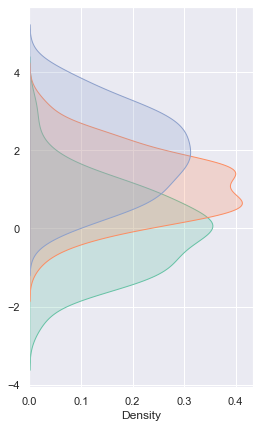

In [178]:
plt.figure(figsize =(4,7))
data = stats.norm(0,1).rvs((3,100))+ np.arange(3)[:, None]

with sns.color_palette("Set2"):
    for d, label in zip(data, list("ABC")):
        sns.kdeplot(d, vertical=True, shade=True, label=label)

You can also use kdeplot to estimate the cumulative distribution function (CDF) of the population from your data. This plot will tell you what proportion of the distribution falls at smaller values than a given point on the `x` axis:

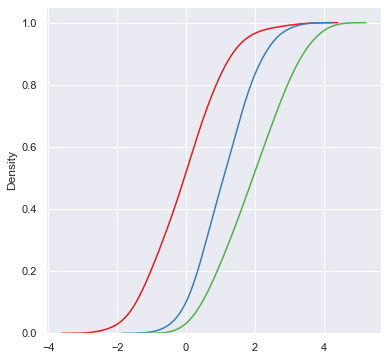

In [179]:
with sns.color_palette("Set1"):
    for d, label in zip(data, list("ABC")):
        sns.kdeplot(d, cumulative=True, label=label)

##Multivariate density estimation with `kdeplot`
You can also use the kernel density method with multidimensional data. For visualization, we are mostly concerned with plotting joint bivariate distributions. As with the hexbin plot, we will color-encode the density estimate over a 2D space. The kdeplot function tries to infer whether it should draw a univariate or bivariate plot based on the type and shape of the `data` argument. If using a 2d array or a DataFrame, the array is assumed to be shaped (`n_units, n_variables`).

In [193]:
data = np.random.multivariate_normal([0, 0], [[1, 2], [2, 20]], size=1000)
data = pd.DataFrame(data)
mpl.rc("figure", figsize=(6, 6))
sns.kdeplot(data)

ValueError: If using all scalar values, you must pass an index

You can also pass in two vectors as the first positional arguments, which will also draw a bivariate density.

In [181]:
sns.kdeplot(data.X, data.Y, shade=True)

AttributeError: 'numpy.ndarray' object has no attribute 'X'

As in the univariate case, you can also set the kernel bandwidth and choose different points at which to clip the data or cut the estimate. However, only the gaussian kernel is availible for the multidimensional kde.

When specifying the colormap, the multivariate `kdeplot` accepts a special token where colormaps that end with `_d` are plotted in a way that maintains the overall color palette but that uses darker colors at one extreme so the contour lines are fully visible.

In [182]:
sns.kdeplot(data, bw="silverman",
            gridsize=50, cut=2, clip=(-11, 11), cmap="BuGn_d")

C:\Program Files\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using silverman for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ValueError: Per-column arrays must each be 1-dimensional

In [183]:
sns.kdeplot(data, bw=1, clip=[(-4, 4), (-11, 11)], cmap="PuRd_d")

C:\Program Files\Python39\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ValueError: Per-column arrays must each be 1-dimensional

In [184]:
sns.kdeplot(data.values, shade=True, bw=(.5, 1), cmap="Purples")

AttributeError: 'numpy.ndarray' object has no attribute 'values'

##Bivariate and univariate plots using `jointplot`:
The `jointplot` function allows you to simultaneously visualize the joint distribution of two variables and the marginal distribution of each. Above, we showed how to use it to draw a hexbin plot. You can also use it to draw a kernel density estimate:

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Program Files\Python39\lib\site-packages\seaborn\_core.py:882: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


ValueError: Could not interpret value `X` for parameter `x`

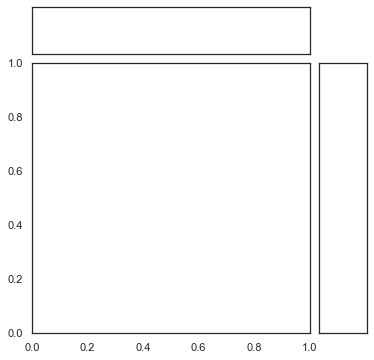

In [185]:
with sns.axes_style("white"):
    sns.jointplot("X", "Y", data, kind="kde")

## Combining plot styles: `histplot`
Each of these styles has advantages and disadvantages. Fortunately, it is easy to combine multiple styles using the `histplot` function in seaborn. ``histplot` provides one interface for plotting histograms, kernel density plots, rug plots, and plotting fitted probability distributions.

By default, you’ll get a kernel density over a histogram. Unlike the default matplotlib `hist` function, `histplot` tries to use a good number of bins for the dataset you have, although all of the options for specifying bins in `hist` can be used.

<AxesSubplot:ylabel='Count'>

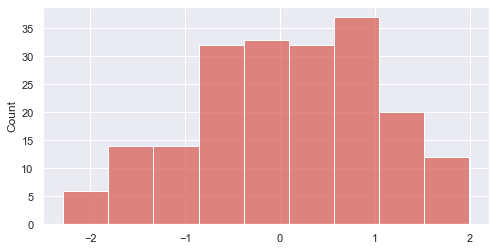

In [195]:
sns.set_palette("hls")
mpl.rc("figure", figsize=(8, 4))
data = randn(200)
sns.histplot(data)

`hist, kde,` and `rug` are boolean arguments to turn those features on and off.

<AxesSubplot:ylabel='Count'>

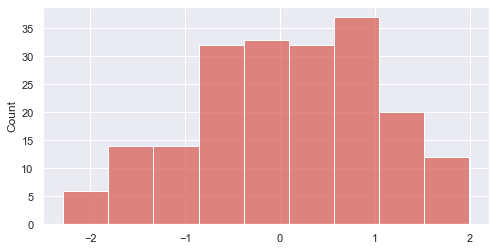

In [198]:
sns.histplot(data)

You can also pass a distribution family from `scipy.stats`, and `distplot` will fit the parameters using maximum likelihood and plot the resulting function.

<AxesSubplot:ylabel='Count'>

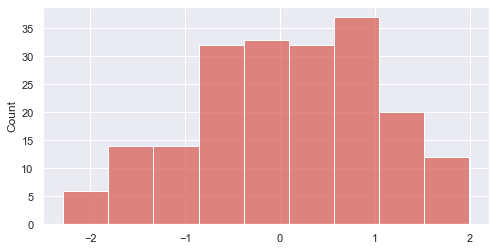

In [200]:
sns.histplot(data, kde=False)

To control any of the underlying plots, pass keyword arguments to the `[plot]_kws` argument.

C:\Program Files\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

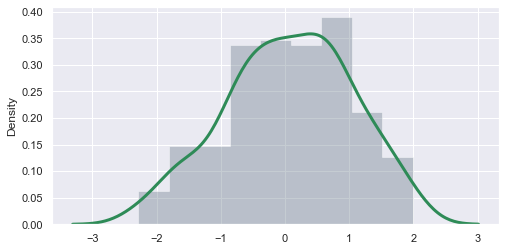

In [202]:
sns.distplot(data,
             kde_kws={"color": "seagreen", "lw": 3, "label": "KDE"},
             hist_kws={"histtype": "stepfilled", "color": "slategray"})

You can also draw the distribution vertically, if for example you wanted to plot marginal distributions on a scatterplot (as in the `jointplot` function):

<AxesSubplot:ylabel='Count'>

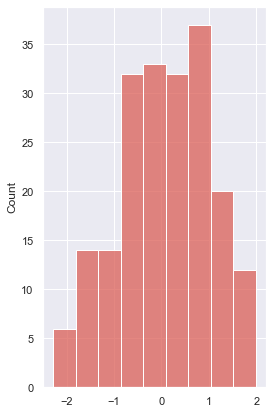

In [204]:
plt.figure(figsize=(4, 7))
sns.histplot(data)

If the data has a `name` attribute (e.g. it is a pandas `Series`), the name will become the label for the dimension on which the distributio is plotted, unless you use `axlabel=False`. You can also provide a string, which will override this behavior and label nameless data.

<AxesSubplot:xlabel='score', ylabel='Count'>

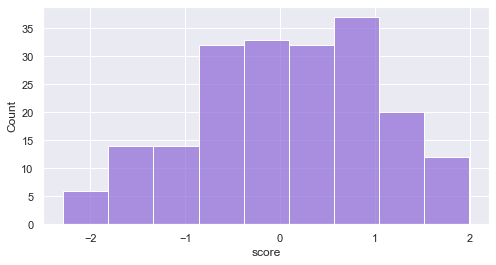

In [205]:
sns.histplot(pd.Series(data, name="score"), color="mediumpurple")

## Comparing distributions: `boxplot` and `violinplot`
Frequently, you will want to compare two or more distributions. Although above we showed one method to do this above, it’s generally better to plot them separately but in the way that allows for easy comparisons.

The traditional approach in this case is to use a boxplot. There is a `boxplot` function in matplotlib we could use...

{'whiskers': [<matplotlib.lines.Line2D at 0x1daf2652070>,
 'caps': [<matplotlib.lines.Line2D at 0x1daf26a97f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1daf26527f0>,
 'medians': [<matplotlib.lines.Line2D at 0x1daf26a9100>,
 'fliers': [<matplotlib.lines.Line2D at 0x1daf26a9b50>,
 'means': []}

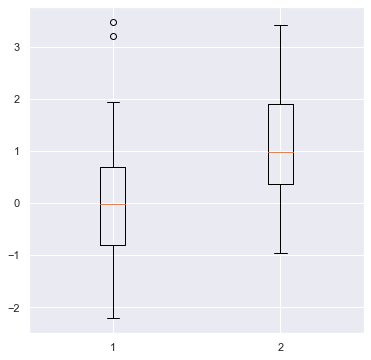

In [211]:
sns.set(rc={"figure.figsize": (6, 6)})
data = [randn(100), randn(100) + 1]
plt.boxplot(data)

...but, it is quite ugly by default. To get more aesthetically pleasing plots, use the `seaborn.boxplot` function:

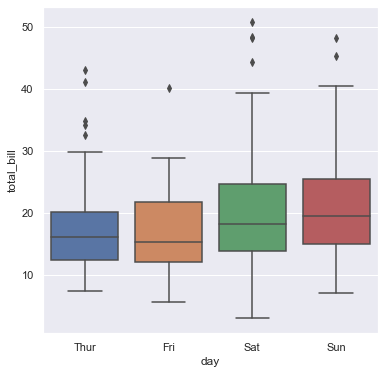

In [213]:
tips = sns.load_dataset("tips")
x = sns.boxplot(x="day", y="total_bill", data=tips)

The default rules for a boxplot are that the box encompasses the inter-quartile range with the median marked. The “whiskers” extend to 1.5 * IQR past the closest quartile, and any observations outside this range are marked as outliers.

This is quite a mouthfull though, and the outliers can be distracting, so you can just make the whiskers extend all the way out. Let’s also tweak the aesthetics a bit.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

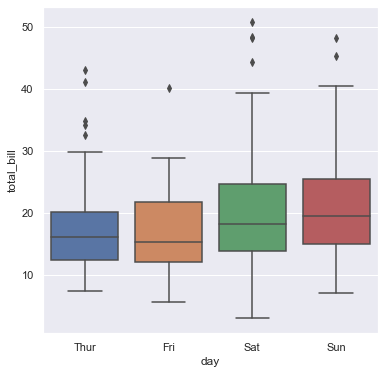

In [217]:
sns.boxplot(x="day", y="total_bill", data=tips)

If fits better with the plot you are drawing, the boxplot can be horiztonal. This just uses the matplotlib parameter, which is awkwardly named `vert`:

In some cases, you may want to plot repeated-measures data. In this case, a subtle effect that is consistent across subjects can be masked and look non-consequential.

To show such an effect, use the `join_rm` argument.

The boxplot is more informative than a bar plot, but it still compresses the a distribution to about five points. Just as the kernel density plot is a modern alternative to the histogram, we can use our computing power to bring more information using a kernel density estimate to these comparative plots.

These plots are known as “violin” (apparently, sometimes “viola”) plots. They essentially combine a boxplot with a kernel density estimate.

Let’s create a toy case that demonstrates why we might prefer the increased information in the violin plot. First, draw a boxplot. Note that the `color` argument can take anything that can be used as a palette in addition to any single valid matplotlib color, and that the function is Pandas-aware and will try to label the axes appropriately.

Based on this plot, it looks like we basically have two samples from the same distribution.

But, let’s just see what the violin plot looks like:

<AxesSubplot:xlabel='total_bill'>

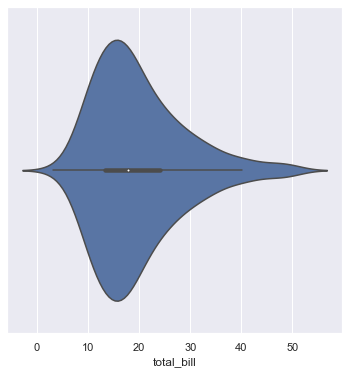

In [227]:
sns.violinplot(x=tips["total_bill"])

Woah! Now it looks like the distribution on the left is roughly normal, but the distribution on the right is bimodal with peaks at +/− 5.

It may be rare to run into such data, but more information doesn’t hurt even in non-pathological cases, and might catch problems that otherwise could slip through.

(Of course, if you looked at each distribution with a histogram/KDE plot as above, you might have caught this before making any comparisons.)

Both the boxplot and violin functions can take a Pandas Series object as the data and an object that can be used to perform a groupby on the data to group it into the boxes/violins.

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score', ylabel='group'>

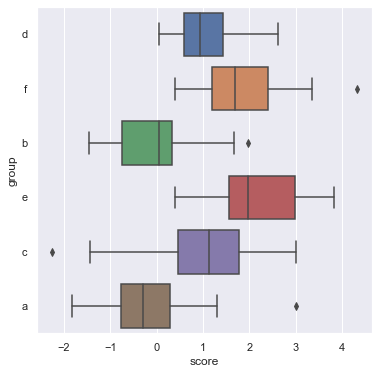

In [233]:
y = np.random.randn(200)
g = np.random.choice(list("abcdef"), 200)
for i, l in enumerate("abcdef"):
    y[g == l] += i // 2
df = pd.DataFrame(dict(score=y, group=g))
sns.boxplot(df.score, df.group)

Much like the `kdeplot`, you can tune the bandwidth of the kernel used to fit the density estimate in the violin.

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score', ylabel='group'>

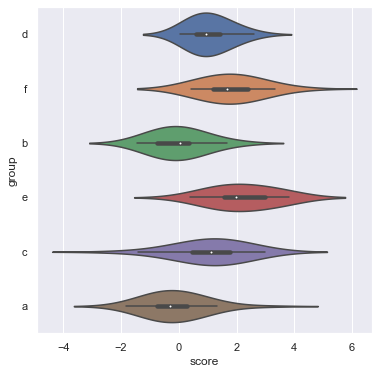

In [235]:
sns.violinplot(df.score, df.group, bw=1)

If using a groupby, the default is to plot the boxes or violins in the sorted order of the group labels. You can override this, though:

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score', ylabel='group'>

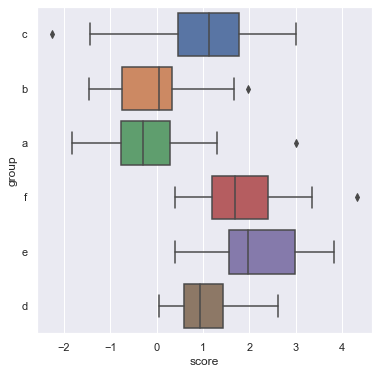

In [236]:
order = list("cbafed")
sns.boxplot(df.score, df.group, order=order)

The violin plot by default plots the median, along with the 25th and 75th percentile – the same information we get from the boxplot. There are, however, other options. You might want to plot each observation (similar to what we do with a rug plot under a KDE). There are two ways to accomplish this.

In [242]:
data = pd.melt(data.loc[:50], value_name="y", var_name="group")

ValueError: Could not interpret input 'points'

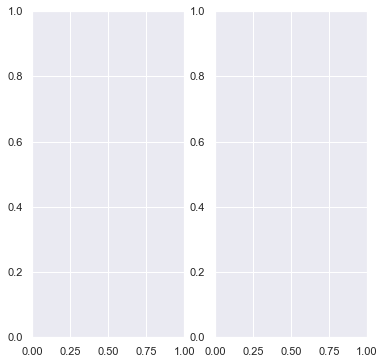

In [244]:
f, (ax_l, ax_r) = plt.subplots(1, 2)
sns.violinplot(data.y, data.group,
               "points", positions=[1, 2], ax=ax_l)
sns.violinplot(data.y, data.group,
               "stick", positions=[3, 4], ax=ax_r)
plt.tight_layout()

Of course, you can plot repeated-measures data with the violin as well.

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

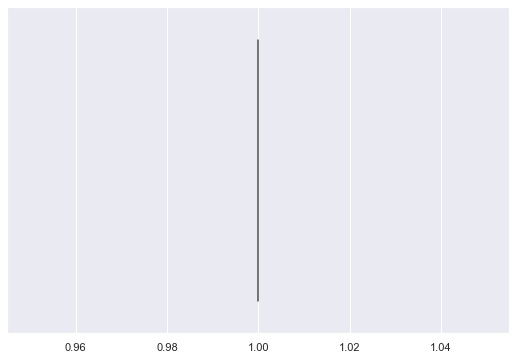

In [251]:
pre = randn(20)
data = pd.DataFrame(dict(pre=pre, 
                         post=pre + 1 + randn(20)),
                    columns=["pre", "post"])
sns.violinplot(data.all())

Using a palette colorscheme can be particularly useful if you have many bins.

<AxesSubplot:>

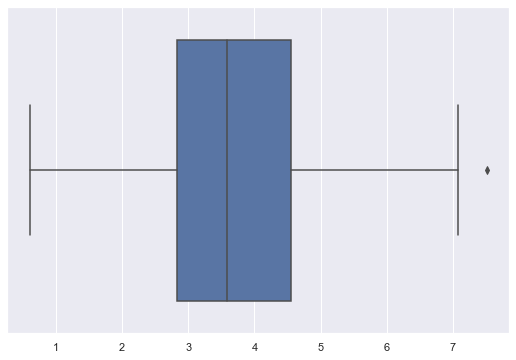

In [246]:
mpl.rc("figure", figsize=(9, 6))
data = randn(50, 8) + np.random.uniform(3, 5, 8)
sns.boxplot(data)

Chose the color scheme carefully! The above is good for categorigal bins, but perhaps there is some ordering to the grouping variable:

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

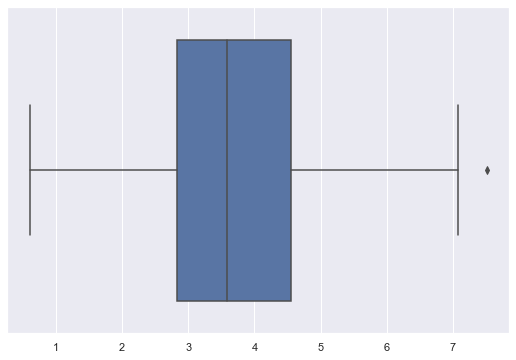

In [249]:
data.sort(axis=1)
sns.boxplot(data)

Different kinds of relationships lend themselves to different kinds of color palettes:

<AxesSubplot:>

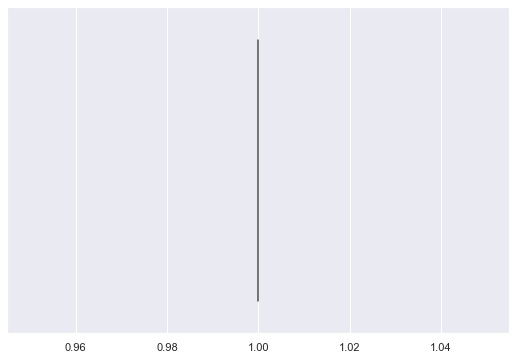

In [253]:
data = data * -1 + data.mean()
sns.violinplot(data.all(), lw=2)

#Linear models with quantitative data
Linear models are very common in statistical analysis. They are used to understand how linear combinations of predictor (or independent) variables relate to a response (or dependent) variable. Seaborn has several functions for exploratory visualizations that correspond with linear regression. This page will focus on the functions that can be used when the main predictor variable (or variables) are quantitative. They differ from functions focused on categorical variables in that they fit and plot a representation of the model itself in the form of a regression line.

In [254]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(sum(map(ord, "linear_quantitative")))

##Visualizing multiple regression with lmplot()
The `lmplot()` function is intended for exploring linear relationships of different forms in multidimensional datasets. Input data must be in a Pandas `DataFrame`. To plot, provide the predictor and response variable names along with the dataset:

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


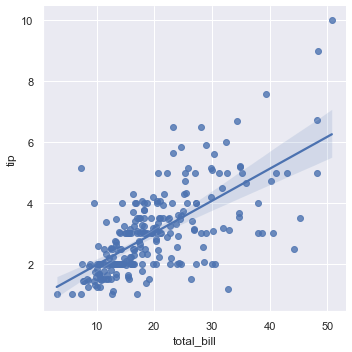

In [255]:
tips = sns.load_dataset("tips")
sns.lmplot("total_bill", "tip", tips)

This plot has two main components. The first is a scatterplot, showing the observed datapoints. The second is a regression line, showing the estimated linear model relating the two variables. Because the regression line is only an estimate, it is plotted with a 95% confidence band to give an impression of the certainty in the model. You can plot different levels of certainty. For instance, it is common to plot the standard error of an estimate, which corresponds to the 68% confidence interval.

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


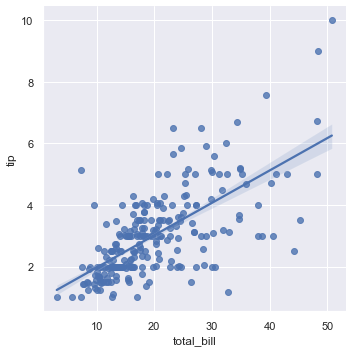

In [256]:
sns.lmplot("total_bill", "tip", tips, ci=68)

Hopefully, the default aesthetics are suitable for exploratory graphics. However, you can also control the aesthetics of the underlying plots separately through dictionaries of keyword arguments for the matplotlib `scatter` and `plot` functions.

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


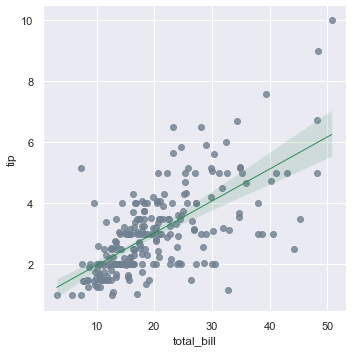

In [257]:
sns.lmplot("total_bill", "tip", tips,
           scatter_kws={"marker": ".", "color": "slategray"},
           line_kws={"linewidth": 1, "color": "seagreen"})

###Plotting with discrete predictor variables
Sometimes you will want to plot data where the independent variable is quantitative, but discrete. Although this works fine out of the box:

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


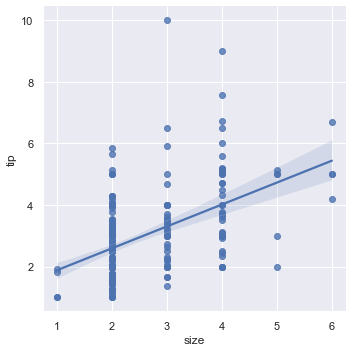

In [258]:
sns.lmplot("size", "tip", tips)

And can be improved with a bit of jitter:

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


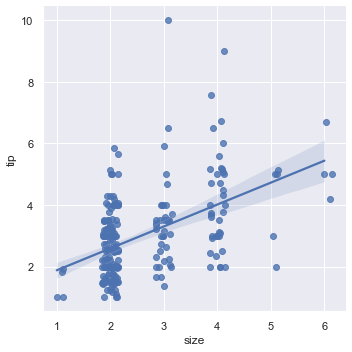

In [259]:
sns.lmplot("size", "tip", tips, x_jitter=.15)

It might be more informative to estimate the central tendency of each bin. This is easy to do with the x_estimator argument. Just pass any function that aggregates a vector of data into one estimate. The estimator will be bootstrapped and a confidence interval will be plotted – 95% by default, as in other cases within these functions.

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


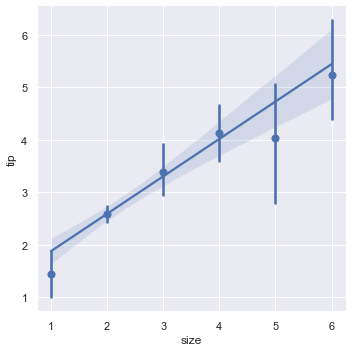

In [260]:
sns.lmplot("size", "tip", tips, x_estimator=np.mean)

It can also be useful to bin continuous predictor variable into discrete values and plot an estimated central tendency and confidence interval. This can be helpful when you have many datapoints and a reliable, but weak, effect. Note that the regression estimate will still fit to the original data; the binning only applies to the visual representation of the observations.

With `lmplot()`, you can provide specific centroid values for the bins:

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


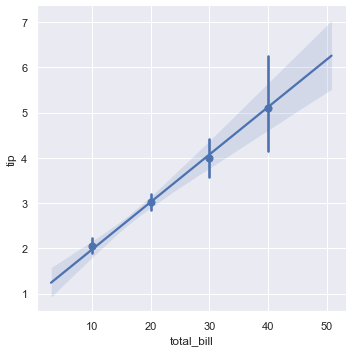

In [261]:
bins = [10, 20, 30, 40]
sns.lmplot("total_bill", "tip", tips, x_bins=bins)

Or, you can give a number of bins and it will find centroids so that they have equal numbers of datapoints in them:

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


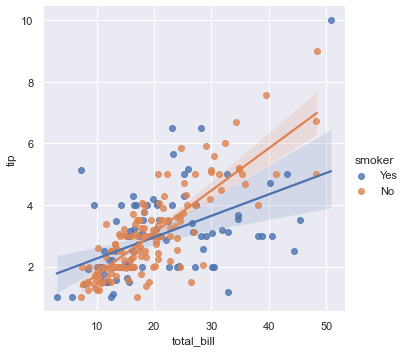

In [262]:
sns.lmplot("total_bill", "tip", tips, hue="smoker")

###Faceted linear model plots
The `lmplot()` function is built on top of a FacetGrid. That means it’s easy to visualize how this relationship changes in different subsets of your dataset. The important thing is that you can supply the names of categorical variables that define subsets of the data to plot in different hues or along the row and columns of a grid of axes.

Using a hue facet makes it easiest to directly compare the two subsets:

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


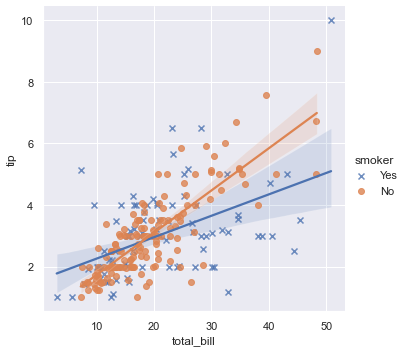

In [263]:
sns.lmplot("total_bill", "tip", tips, hue="smoker", markers=["x", "o"])

To make plots that will better reproduce to black-and-white (i.e. when printed), you may want to let the scatterplot marker vary along with the hue variable.

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


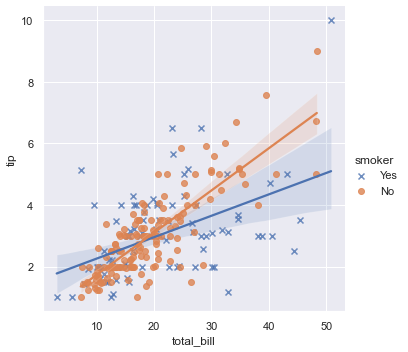

In [264]:
sns.lmplot("total_bill", "tip",
           tips, hue="smoker", markers=["x", "o"])

Plotting in different columns of a grid also makes a plot that’s easy to understand, although direct comparisons between the subsets are more difficult as the data are separated in space. This might be better when you want the viewer to focus on the relationship within each subset independently.

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


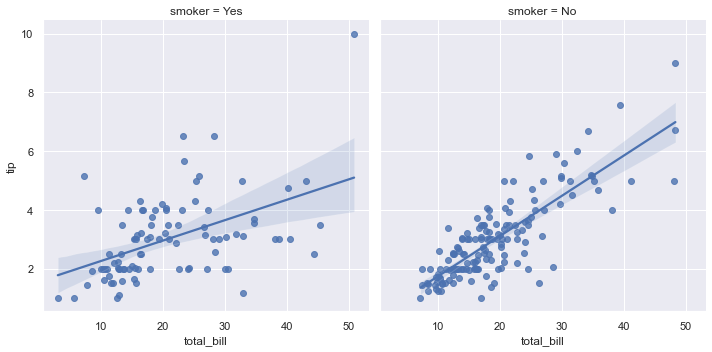

In [265]:
sns.lmplot("total_bill", "tip", tips, col="smoker")

You can also assign the same variable to multiple roles. This lets you plot the data separately and use color to semantically tag different subsets of the data. Using color in this way can be helpful when you are making multiple different kind of plots, and you want to help connect them visually.

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


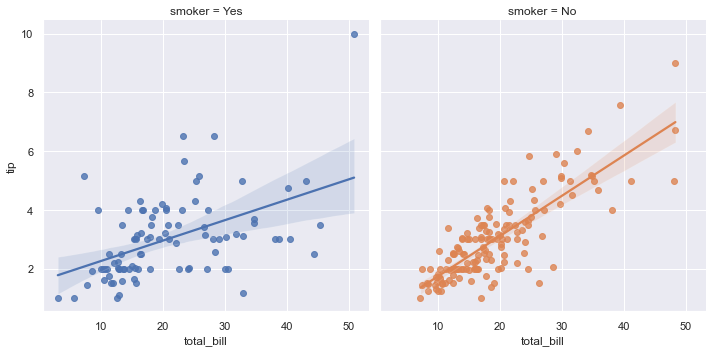

In [266]:
sns.lmplot("total_bill", "tip", tips, col="smoker", hue="smoker")

`lmplot()` accepts all arguments that you would use to initialize a `FacetGrid`, and it returns the grid object after plotting for further tweaking:

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


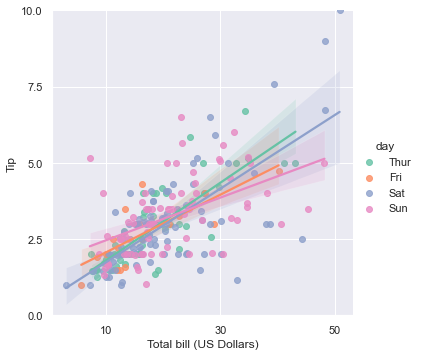

In [267]:
g = sns.lmplot("total_bill", "tip", tips, 
               hue="day", palette="Set2",
               hue_order=["Thur", "Fri", "Sat", "Sun"])
g.set_axis_labels("Total bill (US Dollars)", "Tip");
g.set(xticks=[10, 30, 50], ylim=(0, 10),
      yticks=[0, 2.5, 5, 7.5, 10])

## Plotting different linear relationships
By default, `lmplot()` shows the ordinary least squares fit to the data. However, you don’t actually need to fit a regression at all:

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


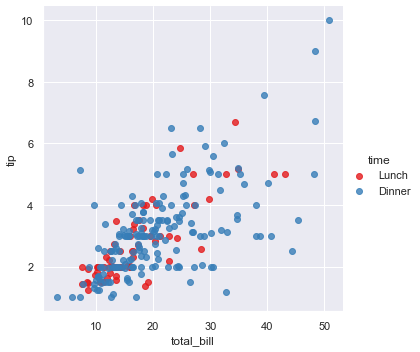

In [268]:
sns.lmplot("total_bill", "tip", tips, hue="time",
           palette="Set1", fit_reg=False)

There are several other choices for how to fit the regression. These options are mutually exclusive.

###Plotting nonlinear trends

You might, for example, wonder if the relationship follows a higher-order trend:

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


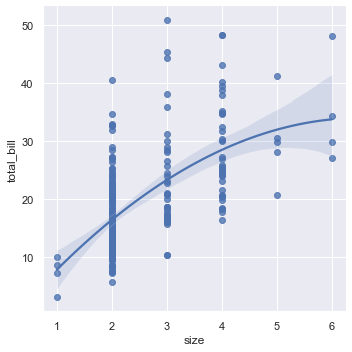

In [269]:
sns.lmplot("size", "total_bill", tips, order=2)

For an even more flexible fit, you can plot the lowess line, which is a nonparametric approach to regression. Note that, currently, lowess plots don’t plot a confidence interval around the line.

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


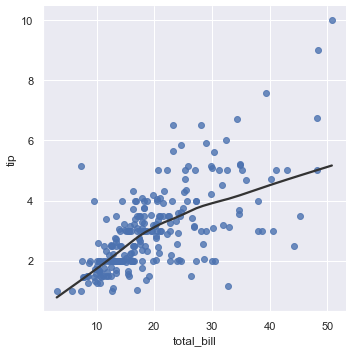

In [271]:
sns.lmplot("total_bill", "tip", tips, 
           lowess=True, line_kws={"color": ".2"})

### Plotting logistic regression

Let’s define a dependent measure that takes the values `True` and `False`.

In [272]:
tips["big_tip"] = (tips["tip"] / tips["total_bill"]) > .15

It’s possible to plot (and fit) these data as normal:

C:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


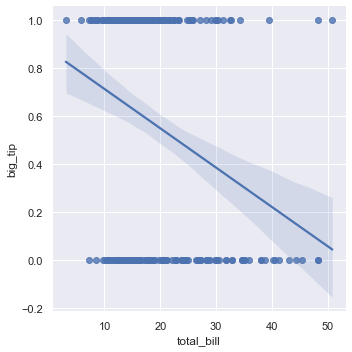

In [273]:
sns.lmplot("total_bill", "big_tip", tips)